# Working with Data and Models From the Literature

A very incomplete set of data from from the literature exist in ``$ARES/input/litdata``. Each file, named using the convention ``<last name of first author><year>.py``, is composed of dictionaries containing the information most useful to *ARES* (at least when first transcribed). 

**NOTE:** May be worth interfacing with [CoReCon](https://github.com/EGaraldi/corecon) at some point! 

To see a complete listing of options, consult the following list:

In [1]:
%pylab inline
import ares
import numpy as np
import matplotlib.pyplot as pl

Populating the interactive namespace from numpy and matplotlib


In [2]:
ares.util.lit_options

['ueda2003',
 'mirocha2016',
 'test_schaerer2002',
 'song2016',
 'whitaker2012',
 'atek2015',
 'mortlock2011',
 'bouwens2017',
 'sazonov2004',
 'dunne2009',
 'parsec',
 'eldridge2009',
 'furlanetto2017',
 'mirocha2017',
 'finkelstein2012',
 'noeske2007',
 'leitherer1999',
 'alavi2016',
 'haardt2012',
 'tomczak2014',
 'feulner2005',
 'bpass_v1',
 'aird2015',
 'mirocha2018',
 'marchesini2009_10',
 'emma',
 'vanderburg2010',
 'mirocha2019',
 'duncan2014',
 'daddi2007',
 'starburst99',
 'oesch2014',
 'eldridge2017',
 'bowler2020',
 'calzetti1994',
 'oesch2013',
 'sanders2015',
 'kajisawa2010',
 'lee2011',
 'stefanon2017',
 'stark2011',
 'mcbride2009',
 'madau2014',
 'parsa2016',
 'stark2010',
 'oesch2016',
 'morishita2018',
 'perez2008',
 'ferland1980',
 'bpass_v2',
 'bowman2018',
 'sun2020',
 'rojasruiz2020',
 'stefanon2019',
 'kusakabe2020',
 'finkelstein2015',
 'moustakas2013',
 'bouwens2015',
 'mirocha2020',
 'reddy2009',
 'mclure2013',
 'robertson2015',
 'mesinger2016',
 'kroupa2001',

If any of these papers ring a bell, you can check out the contents in the following way:

In [3]:
litdata = ares.util.read_lit('mirocha2017')  # a self-serving example

or, look directly at the source code, which lives in ``$ARES/input/litdata``. Hopefully the contents of these files are fairly self-explanatory! 

We'll cover a few options below that I've used often enough to warrant the development of special routines to interface with the data and/or to plot the results nicely.

## The high-z galaxy luminosity function

Measured luminosity functions from the following works are included in *ARES*:

* Bouwens et al. (2015)
* Finkelstein et al. (2015)
* Parsa et al. (2016)
* van der Burg et al. (2010)
* ... many more now

## Stellar population models

Currently, *ARES* can easily handle both the *starburst99* original dataset and the *BPASS* version 1.0 models (both of which are downloaded automatically). You can access the data via

In [4]:
s99 = ares.util.read_lit('leitherer1999')
bpass = ares.util.read_lit('eldridge2009')

or, to create more useful objects for handling these data

In [5]:
s99 = ares.sources.SynthesisModel(source_sed='leitherer1999')
bpass = ares.sources.SynthesisModel(source_sed='eldridge2009')

The spectra for these models are stored in the exact same way to facilitate comparison and uniform use throughout *ARES*. The most important attributes are ``wavelengths`` (or ``energies`` or ``frequencies``), ``times``, and ``data`` (a 2-D array with shape (``wavelengths``, ``times``)). So, to compare the spectra for continuous star formation in the steady-state limit (*ARES* assumes continuous star formation by default), you could do:

# Loaded fig8b.dat
# Loaded $ARES/input/bpass_v1/SEDS/sed.bpass.constant.nocont.sin.z020


(1e+33, 1e+41)

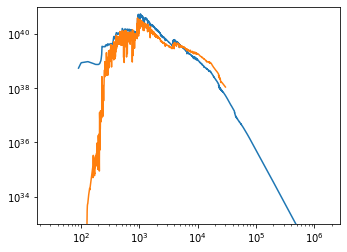

In [6]:
pl.loglog(s99.wavelengths, s99.data[:,-1])
pl.loglog(bpass.wavelengths, bpass.data[:,-1])
pl.ylim(1e33, 1e41)

The most common options for these models are: ``pop_Z``, ``pop_ssp``, ``pop_binaries``, ``pop_imf``, and ``pop_nebular``. See :doc:`params_populations` for a description of each of these parameters.



## Parametric SEDs for galaxies and quasars

So far, there is only one litdata module in this category: the multi-wavelength AGN template described in Sazonov et al. 2004.

## Reproducing Models from *ARES* Papers

If you're interested in reproducing a model from a paper exactly, you can either (1) contact me directly for the model of interest, or preferably (someday) download it from my website, or (2) re-compute it yourself. In the latter case, you just need to make sure you supply the required parameters. To facilitate this, I store "parameter files" (just dictionaries) in the litdata framework as well. You can access them like any other dataset from the literature, e.g., 

In [7]:
m17 = ares.util.read_lit('mirocha2017')

A few of the models we focused on most get their own dictionary, for example our reference double power law model for the star-formation efficiency is stored in the ``dpl`` variable:

# Loaded $ARES/input/inits/inits_planck_TTTEEE_lowl_lowE_best.txt.

##############################################################################################################
####                                      ARES Simulation: Overview                                       ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Source Populations                                                                                   ####
#### ---------------------------------------------------------------------------------------------------- ####
####               sfrd      sed    radio    O/IR    Ly-a     LW     Ly-C   X-ray    RTE                  ####
#### pop #0  :   sfe-func    yes                      x       x       x               x                   ####
#### pop #1  : link:sfrd:0   yes            

gs-21cm: 100% |###############################################################################| Time:  0:00:02 


(<AxesSubplot:xlabel='$\\nu \\ (\\mathrm{MHz})$', ylabel='$\\delta T_b \\ (\\mathrm{mK})$'>,
 <AxesSubplot:label='b839d810-52a6-4793-a7d2-fb8b81fa2c91', xlabel='$z$'>)

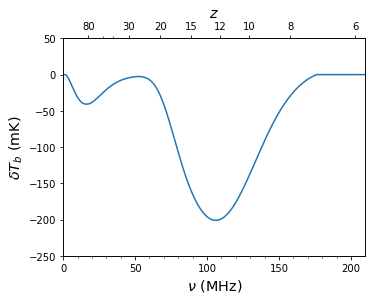

In [8]:
sim = ares.simulations.Global21cm(**m17.dpl)
sim.run()
sim.GlobalSignature()  # voila!

Hopefully this results *exactly* in the solid black curve from Figure 2 of `Mirocha, Furlanetto, & Sun (2017) <http://adsabs.harvard.edu/abs/2017MNRAS.464.1365M>`_, provided you're using *ARES* version 0.2. If it doesn't, please contact me.

**NOTE:** If using a newer version of the code, this may shift slightly due to changes in the default cosmological parameters and halo mass function. If you pull a recent version and the result is significantly different, please get in touch with me.

Alternatively, you can use the ``ParameterBundle`` framework, which also taps into our collection of data from the literature. To access the set of parameters for the "dpl" model, you simply do:

In [9]:
pars = ares.util.ParameterBundle('mirocha2017:dpl')

This tells *ARES* to retrieve the ``dpl`` variable within the ``mirocha2017`` module. See :doc:`param_bundles` for more on these objects.

### [Mirocha, Furlanetto, & Sun (2017)](http://adsabs.harvard.edu/abs/2017MNRAS.464.1365M) (``mirocha2017``)

This model has a few options: ``dpl``, and the extensions ``floor`` and ``steep``, as explored in the paper. 

Non-standard pre-requisites:
    * High resolution optical depth table for X-ray background. To generate one for yourself, navigate to ``$ARES/input/optical_depth`` and open the ``generate_optical_depth_tables.py`` file. Between lines 35 and 45 there are a block of parameters that set the resolution of the table. Make sure that ``helium=1``, ``zi=50``, ``zf=5``, and ``Nz=[1e3]``. It should only take a few minutes to generate this table.
    
The following parameters are uncertain and typically treated as free parameters within the ranges denoted by brackets (not all of which are hard limits):

    * ``pop_Z{0}``, :math:`[0.001, 0.04]`
    * ``pop_Tmin{0}``, :math:`[300, \sim \mathrm{few} \times 10^5]`  (``pop_Tmin{1}`` is tied to this value by default).
    * ``pop_fesc{0}``, in general can lie in range :math:`[0, 1]`, but for consistency with observational constraints on :math:`\tau_e` (from, e.g., *Planck*), it's probably best to limit values to :math:`\lesssim 0.2`.
    * ``pop_fesc_LW{0}``, :math:`[0, 1]`
    * ``pop_rad_yield{1}``, :math:`[10^{38}, 10^{42}]` :math:`2.6 \times 10^{39}` by default
    * ``pop_logN{1}``, :math:`[18, 23]`, :math:`-\infty` by default.

**NOTE:** Changes in the metallicity (``pop_Z{0}``) in general affect the luminosity function (LF). However, by default, the normalization of the star formation efficiency will automatically be adjusted to guarantee that the LF does *not* change upon changes to ``pop_Z{0}``. Set the ``pop_calib_lum{0}`` parameter to ``None`` to remove this behavior.

To re-make the right-hand panel of Figure 1 from the paper, you could do something like:

# WARNING: revisit scalability wrt fesc.
# WARNING: revisit scalability wrt fesc.
# WARNING: revisit scalability wrt fesc.


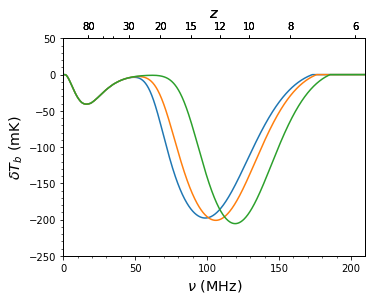

In [10]:
dpl = ares.util.ParameterBundle('mirocha2017:dpl')
    
ax = None
for model in ['floor', 'dpl', 'steep']:
    pars = dpl + ares.util.ParameterBundle('mirocha2017:%s' % model)
    sim = ares.simulations.Global21cm(verbose=False, progress_bar=False, **pars)
    sim.run()
    ax, zax = sim.GlobalSignature(ax=ax)

For more thorough parameter space explorations, you might want to consider using the ``ModelGrid`` (see [the example](example_grid) or ``ModelSample`` (:doc:`example_mc_sampling`) machinery. If you'd like to do some forecasting or fitting with these models, check out :doc:`example_mcmc_gs` and :doc:`example_mcmc_lf`.

**NOTE:** Notice that the ``floor`` and ``steep`` options are defined *relative* to the ``dpl`` model, i.e., they only contain the parameters that are different from the ``dpl`` model, which is why we updated the parameter dictionary rather than creating a new one just with the ``steep`` or ``floor`` parameters.


### [Furlanetto et al. (2017)](https://arxiv.org/abs/1611.01169) (``furlanetto2017``)

The main options in this model are whether to use momentum-driven or energy-driven feedback, what are accessible separately via, e.g., 

In [11]:
E = ares.util.ParameterBundle('furlanetto2017:energy')
p = ares.util.ParameterBundle('furlanetto2017:momentum')
fshock = ares.util.ParameterBundle('furlanetto2017:fshock')

The only difference is the assumed slope of the star formation efficiency in low-mass halos, which is defined in the parameter ``'pq_func_par2[0]'``, i.e., the third parameter (``par2``) of the first parameterized quantity (``[0]``), in addition to a power-law index that describes the rate of redshift evolution, ``pq_func_par2[1]``.

To do a quick comparison, you could simply do: 

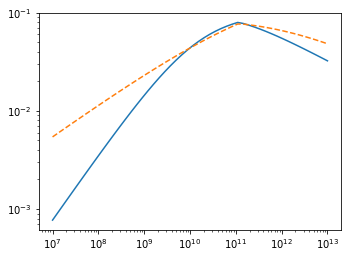

In [12]:
import ares
    
ls = ['-', '--']
for i, model in enumerate([E, p]):
    pars = model + fshock
    pop = ares.populations.GalaxyPopulation(**pars)
    M = np.logspace(7, 13)
    pl.loglog(M, pop.fstar(z=6, Mh=M), ls=ls[i])
    
pl.xlabel(r'$M_h / M_{\odot}$')
pl.ylabel(r'$f_{\ast}$')

### Creating your own

As with parameter bundles, you can write your own litdata modules without modifying the *ARES* source code. Just create a new ``.py`` file and stick it in one of the following places (searched in this order!):

* Your current working directory.
* ``$HOME/.ares``
* ``$ARES/input/litdata``

For example, if I created the following file (``junk_lf.py``; which you'll notice resembles the other LF litdata modules) in my current directory:

In [13]:
redshifts = [4, 5]
wavelength = 1600.
units = {'phi': 1}  # i.e., not abundances not recorded as log10 values

data = {}
data['lf'] = \
{
 4: {
     'M': [-23, -22, -21, -20],
     'phi': list(np.random.rand(4) * 1e-4),
     'err': [tuple(np.random.rand(2) * 1e-7) for i in range(4)]
    },
 5: {
     'M': [-23, -22, -21, -20],
     'phi': list(np.random.rand(4) * 1e-4),
     'err': [tuple(np.random.rand(2) * 1e-7) for i in range(4)],
    }
}

then the built-in plotting routines will automatically find it. For example, you could compare this completely made-up LF with the rest via the commands `obslf = ares.analysis.GalaxyPopulation(); ax = obslf.Plot(z=4, sources='junk_lf')`.